In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

folder_data = '../data'

files = os.listdir(folder_data)

df_cha = pd.read_csv(f'{folder_data}/{files[0]}',encoding='ISO-8859-1')
print(files[0])
df_del = pd.read_csv(f'{folder_data}/{files[1]}',encoding='ISO-8859-1')
print(files[1])
df_dri = pd.read_csv(f'{folder_data}/{files[2]}',encoding='ISO-8859-1')
print(files[2])
df_hub = pd.read_csv(f'{folder_data}/{files[3]}',encoding='ISO-8859-1')
print(files[3])
df_ord = pd.read_csv(f'{folder_data}/{files[4]}',encoding='ISO-8859-1')
print(files[4])
df_pay = pd.read_csv(f'{folder_data}/{files[5]}',encoding='ISO-8859-1')
print(files[5])
df_sto = pd.read_csv(f'{folder_data}/{files[6]}',encoding='ISO-8859-1')
print(files[6])


channels.csv
deliveries.csv
drives.csv
hubs.csv
orders.csv
payments.csv
stores.csv


- Numa ação de marketing, para atrair mais entregadores, vamos dar uma bonificação 
para os 20 entregadores que possuem maior distância percorrida ao todo. A bonificação vai variar 
de acordo com o tipo de profissional que ele é e o modelo que ele usa para se locomover (moto, bike, etc).
 Levante essas informações.

quantas modalidades existem:

In [28]:
df_dri.driver_modal.unique()

array(['MOTOBOY', 'BIKER'], dtype=object)

In [29]:
df_dri.driver_modal.value_counts()

driver_modal
MOTOBOY    3222
BIKER      1602
Name: count, dtype: int64

In [30]:
df_dri.driver_type.unique()

array(['LOGISTIC OPERATOR', 'FREELANCE'], dtype=object)

In [31]:
df_dri.driver_type.value_counts()

driver_type
FREELANCE            3939
LOGISTIC OPERATOR     885
Name: count, dtype: int64

In [32]:
df_del.delivery_status.value_counts()

delivery_status
DELIVERED     371367
CANCELLED       7253
DELIVERING       223
Name: count, dtype: int64

In [22]:
#transformation
df_delivered = df_del[df_del['delivery_status'] == 'DELIVERED']
df_delivered_nona = df_delivered.dropna()
df_delivered_only_null = df_delivered[df_delivered['driver_id'].isna()]

In [24]:
df_delivered.loc[:,'isnull_or_notnull'] = df_delivered['driver_id'].map(lambda x: 'isnull' if pd.isnull(x) else 'notnull')

In [25]:
df_delivered.isnull_or_notnull.value_counts()

isnull_or_notnull
notnull    362766
isnull       8601
Name: count, dtype: int64

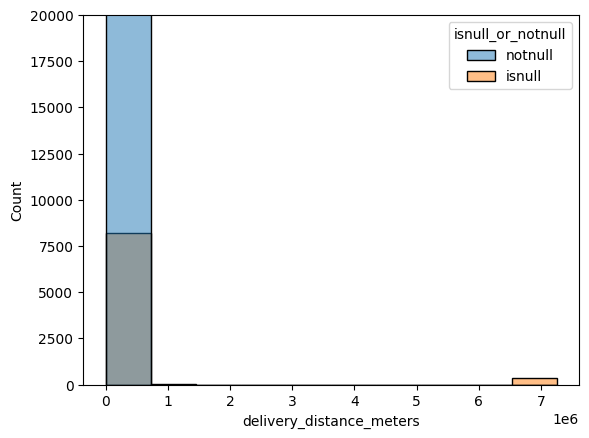

In [11]:
sns.histplot(df_delivered,x='delivery_distance_meters', hue='isnull_or_notnull',bins=10)
plt.ylim(0,20000)
plt.show()

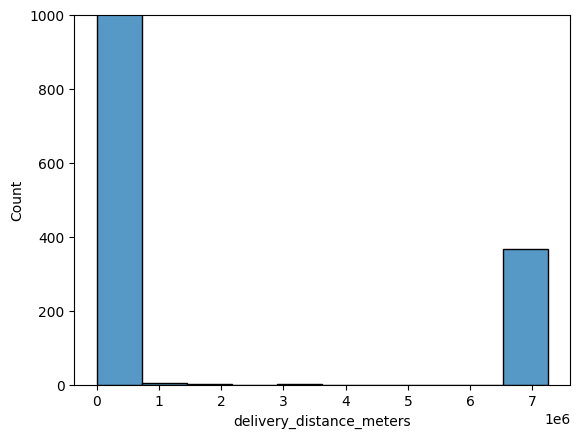

In [26]:
sns.histplot(df_delivered_only_null,x='delivery_distance_meters',bins=10)
plt.ylim(0,1000)
plt.show()

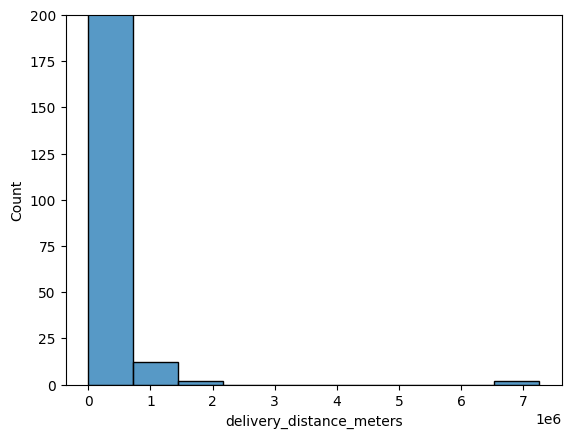

In [27]:
sns.histplot(df_delivered_nona,x='delivery_distance_meters',bins=10)
plt.ylim(0,200)
plt.show()

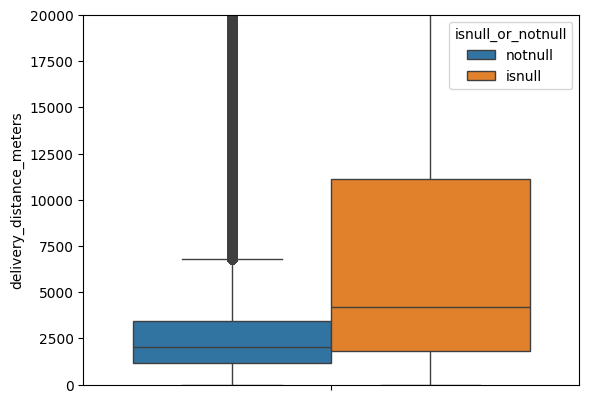

In [28]:
sns.boxplot(df_delivered, hue='isnull_or_notnull', y='delivery_distance_meters')
plt.ylim(0,20000)
plt.show()

In [30]:
Q1 = df_delivered['delivery_distance_meters'].quantile(0.25)
Q3 = df_delivered['delivery_distance_meters'].quantile(0.75)

#Q1isna = df_delivered_isna['delivery_distance_meters'].quantile(0.25)
#Q3isna = df_delivered_isna['delivery_distance_meters'].quantile(0.75)

#Q1nona = df_delivered_nona['delivery_distance_meters'].quantile(0.25)
#Q3nona = df_delivered_nona['delivery_distance_meters'].quantile(0.75)

IQR = Q3 - Q1
#IQRisna = Q3isna - Q1isna
#IQRnona = Q3nona - Q1nona

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df_delivered[(df_delivered['delivery_distance_meters'] <= upper_bound)]

#lower_bound = Q1isna - 1.5 * IQRisna
#upper_bound = Q3isna + 1.5 * IQRisna
#df_no_outliers_isna = df_delivered_isna[(df_delivered_isna['delivery_distance_meters'] <= upper_bound)]
#
#lower_bound = Q1nona - 1.5 * IQRnona
#upper_bound = Q3nona + 1.5 * IQRnona
#df_no_outliers_nona = df_delivered_nona[(df_delivered_nona['delivery_distance_meters'] <= upper_bound)]


<Axes: ylabel='delivery_distance_meters'>

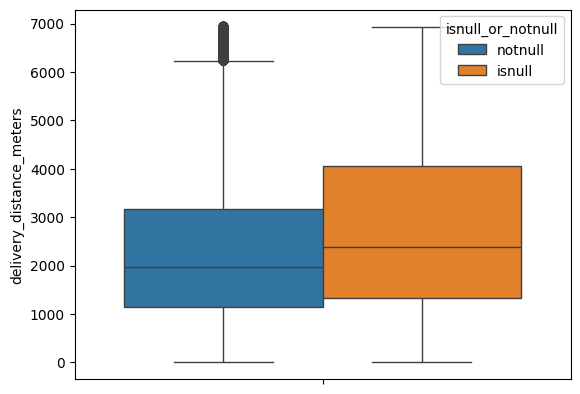

In [31]:
sns.boxplot(df_no_outliers, hue='isnull_or_notnull', y='delivery_distance_meters')

<Axes: xlabel='delivery_distance_meters', ylabel='Count'>

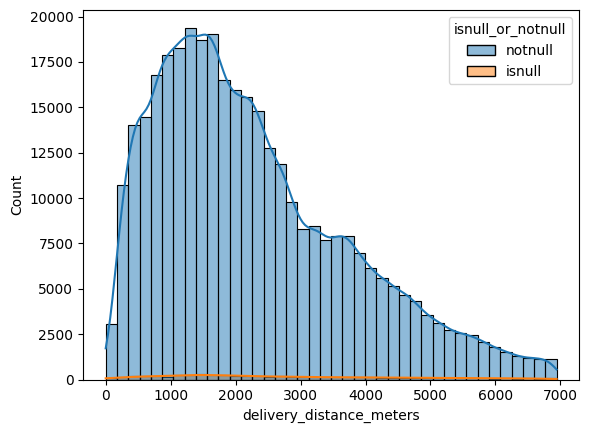

In [32]:
sns.histplot(df_no_outliers,x='delivery_distance_meters',bins=40,kde=True, hue='isnull_or_notnull')

<Axes: xlabel='delivery_distance_meters', ylabel='Count'>

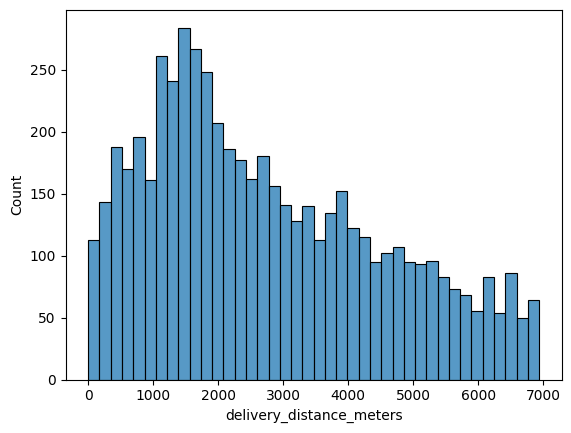

In [34]:
sns.histplot(df_no_outliers[df_no_outliers['isnull_or_notnull']=='isnull'],x='delivery_distance_meters',bins=40)

<Axes: xlabel='delivery_distance_meters', ylabel='Count'>

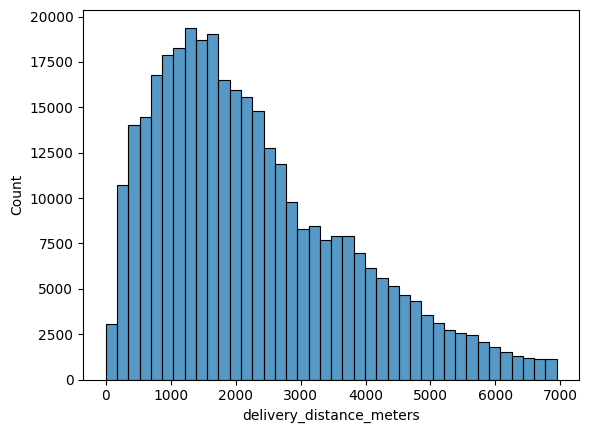

In [35]:
sns.histplot(df_no_outliers[df_no_outliers['isnull_or_notnull']=='notnull'],x='delivery_distance_meters',bins=40)

Como podemos notar grande parte das possíveis fraudes estão em usuários nulos. Para esta tarefa é recomendado remover usuarios nulos, pois sem identicação é impossivel contacta-los para anunciar que ganharam.

In [38]:
df_dri.columns

Index(['driver_id', 'driver_modal', 'driver_type'], dtype='object')

In [63]:
#Transformation
df_merged = df_no_outliers[df_no_outliers['isnull_or_notnull']=='notnull'].merge(df_dri[['driver_modal', 'driver_type','driver_id']],on='driver_id', how='left').drop('isnull_or_notnull',axis=1)

<Axes: xlabel='delivery_distance_meters', ylabel='Count'>

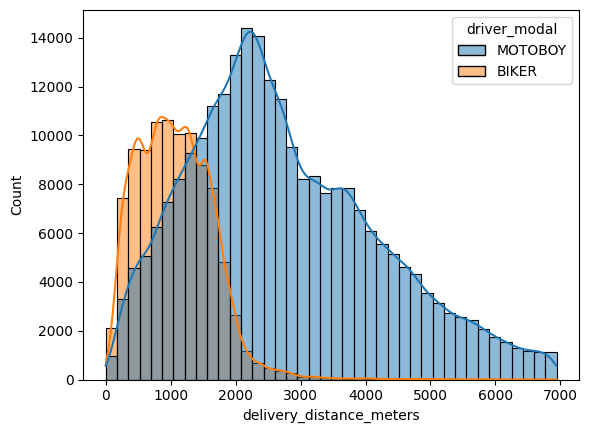

In [64]:
sns.histplot(df_merged,x='delivery_distance_meters',bins=40, kde=True, hue= 'driver_modal')

<Axes: xlabel='delivery_distance_meters', ylabel='Count'>

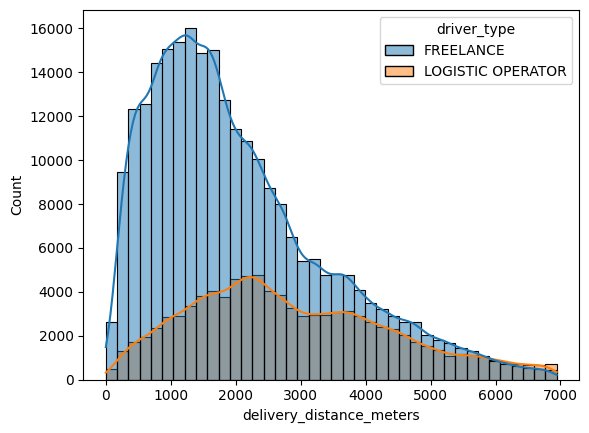

In [39]:
sns.histplot(df_merged,x='delivery_distance_meters',bins=40, kde=True, hue= 'driver_type')

<Axes: ylabel='delivery_distance_meters'>

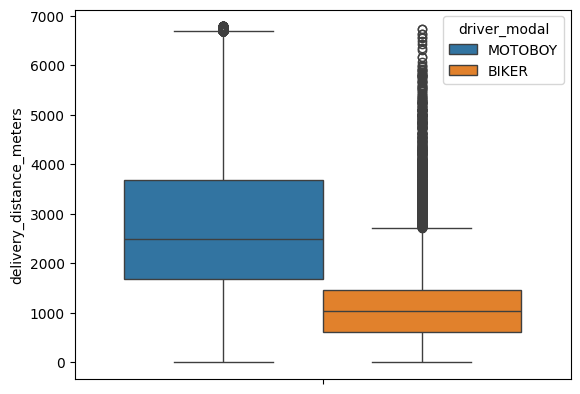

In [51]:
sns.boxplot(df_merged, y='delivery_distance_meters' ,hue = 'driver_modal')

<Axes: ylabel='delivery_distance_meters'>

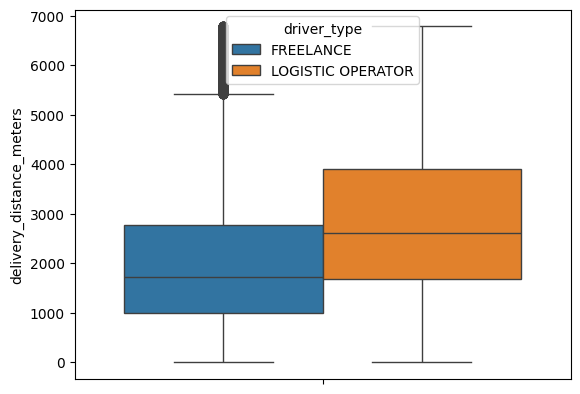

In [52]:
sns.boxplot(df_merged, y='delivery_distance_meters' ,hue = 'driver_type')

In [54]:
df_merged.driver_modal.value_counts(normalize=True)

driver_modal
MOTOBOY    0.718761
BIKER      0.281239
Name: proportion, dtype: float64

In [55]:
df_merged.driver_type.value_counts(normalize=True)

driver_type
FREELANCE            0.729438
LOGISTIC OPERATOR    0.270562
Name: proportion, dtype: float64

In [65]:
top_no_strat = df_merged[['driver_id','delivery_distance_meters']]\
    .groupby('driver_id').sum()\
        .sort_values('delivery_distance_meters',ascending=False)\
            .merge(df_dri[['driver_modal', 'driver_type','driver_id']],on='driver_id', how='left')

In [66]:
prop= top_no_strat[['driver_modal','driver_type']].value_counts(normalize=True).values

In [67]:
top_no_strat[['driver_modal','driver_type']].value_counts(normalize=True)

driver_modal  driver_type      
MOTOBOY       FREELANCE            0.463883
BIKER         FREELANCE            0.349459
MOTOBOY       LOGISTIC OPERATOR    0.186437
BIKER         LOGISTIC OPERATOR    0.000221
Name: proportion, dtype: float64

In [68]:
st1 =int(prop[0]*20)
st2 =int(prop[1]*20)
st3 =int(prop[2]*20)
st4 =20-(st1+st2+st3)

In [69]:
df_strat= pd.concat([top_no_strat[(top_no_strat['driver_modal']=='MOTOBOY') & (top_no_strat['driver_type']=='FREELANCE')][:st1],
        top_no_strat[(top_no_strat['driver_modal']=='BIKER') & (top_no_strat['driver_type']=='FREELANCE')][:st2],
        top_no_strat[(top_no_strat['driver_modal']=='MOTOBOY') & (top_no_strat['driver_type']=='LOGISTIC OPERATOR')][:st3],
        top_no_strat[(top_no_strat['driver_modal']=='BIKER') & (top_no_strat['driver_type']=='LOGISTIC OPERATOR')][:st4]
],axis=0)

In [70]:
if len(df_strat)!=20:
    df_strat= pd.concat([top_no_strat[(top_no_strat['driver_modal']=='MOTOBOY') & (top_no_strat['driver_type']=='FREELANCE')][:st1+1],
        top_no_strat[(top_no_strat['driver_modal']=='BIKER') & (top_no_strat['driver_type']=='FREELANCE')][:st2],
        top_no_strat[(top_no_strat['driver_modal']=='MOTOBOY') & (top_no_strat['driver_type']=='LOGISTIC OPERATOR')][:st3],
        top_no_strat[(top_no_strat['driver_modal']=='BIKER') & (top_no_strat['driver_type']=='LOGISTIC OPERATOR')][:st4]
],axis=0)

- Além disso, o time de Pricing precisa ajustar os valores pagos aos entregadores. Para isso, eles precisam da distribuição da distância média percorrida pelos motoqueiros separada por estado, já que cada região terá seu preço.

In [71]:
df_merged_store_id = df_merged.merge(df_ord[['store_id','order_id']],how='left', left_on='delivery_order_id', right_on='order_id')

In [72]:
df_merged_store_id = df_merged_store_id.drop('delivery_order_id', axis=1)

In [73]:
df_state= df_merged_store_id.merge(df_sto[['hub_id','store_id']], on='store_id', how='left')\
    .merge(df_hub[['hub_id','hub_state']],on='hub_id', how='left')

In [74]:
df_state

,delivery_id,driver_id,delivery_distance_meters,delivery_status,driver_modal,driver_type,store_id,order_id,hub_id,hub_state
0,2174658,8378.0,5199.0,DELIVERED,MOTOBOY,FREELANCE,631,68413340,28,SP
1,2174660,2473.0,410.0,DELIVERED,BIKER,FREELANCE,236,68414309,13,RJ
2,2174661,7615.0,3784.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,1016,68416230,36,RS
3,2174663,8378.0,5714.0,DELIVERED,MOTOBOY,FREELANCE,631,68412721,28,SP
4,2174675,10463.0,3746.0,DELIVERED,MOTOBOY,LOGISTIC OPERATOR,3265,68414018,37,SP
...,...,...,...,...,...,...,...,...,...,...
347435,3128338,24358.0,3667.0,DELIVERED,MOTOBOY,FREELANCE,983,93125719,35,RJ
347436,3130930,22345.0,3414.0,DELIVERED,MOTOBOY,FREELANCE,100,93111400,8,RJ
347437,3135849,55429.0,2546.0,DELIVERED,MOTOBOY,FREELANCE,435,82340127,16,RJ
347438,3142829,47016.0,3106.0,DELIVERED,MOTOBOY,FREELANCE,2112,88586792,51,RJ


In [77]:
df_state[['hub_state','delivery_distance_meters']].groupby('hub_state').mean()

,delivery_distance_meters
hub_state,
PR,2659.183604
RJ,2066.090581
RS,2877.703782
SP,2279.125666


In [81]:
df_ord.order_status.unique()

array(['CANCELED', 'FINISHED'], dtype=object)

In [80]:
df_ord[df_ord['order_status']=='FINISHED']

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
8,68410055,2181,35,68410055,68410055,FINISHED,394.80,0.01,6.00,2,...,1/2/2021 6:35:49 PM,NaN,1/2/2021 6:57:34 PM,6.63,4.55,2391.25,7.17,11.72,21.75,2424.72
17,68412721,631,5,68412721,68412721,FINISHED,195.05,11.90,10.93,14,...,1/1/2021 2:49:18 PM,NaN,1/1/2021 4:12:36 PM,0.27,10.22,26.07,0.83,11.05,83.30,120.42
18,68413340,631,5,68413340,68413340,FINISHED,46.90,11.90,11.36,14,...,1/1/2021 2:42:08 PM,NaN,1/1/2021 3:31:54 PM,7.03,3.10,14.62,9.57,12.67,49.78,77.05
19,68414018,3265,5,68414018,68414018,FINISHED,45.80,0.00,10.28,14,...,1/1/2021 2:58:17 PM,NaN,1/1/2021 3:09:20 PM,10.22,3.03,27.48,10.25,13.28,11.05,51.82
20,68414309,236,5,68414309,68414309,FINISHED,94.90,11.90,6.00,14,...,1/1/2021 2:43:36 PM,NaN,1/1/2021 2:50:20 PM,2.37,1.45,15.78,5.33,6.78,6.73,29.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368994,93139806,2074,5,93139806,93139806,FINISHED,28.00,0.00,0.00,23,...,5/1/2021 12:44:39 AM,NaN,5/1/2021 1:08:04 AM,0.67,18.33,22.00,4.80,23.13,23.42,68.53
368995,93139809,707,5,93139809,93139809,FINISHED,49.00,11.90,10.04,23,...,5/1/2021 12:36:36 AM,NaN,5/1/2021 12:57:16 AM,1.42,3.48,27.32,6.13,9.62,20.67,57.60
368996,93139813,631,5,93139813,93139813,FINISHED,128.70,11.90,9.29,23,...,5/1/2021 12:47:47 AM,NaN,5/1/2021 1:05:20 AM,11.72,6.38,29.97,11.75,18.13,17.55,65.65
368997,93139814,631,5,93139814,93139814,FINISHED,127.40,11.90,5.00,23,...,5/1/2021 12:31:50 AM,NaN,5/1/2021 12:45:00 AM,NaN,NaN,30.27,NaN,1.88,13.17,45.32
